In [1]:
import pandas as pd 
import numpy as np 
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mplpip

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import r2_score as r2 # evaluation metric
from sklearn.preprocessing import MinMaxScaler # Data normalization
from sklearn.metrics import mean_absolute_percentage_error # evaluation metric

In [2]:
# Load data
df = pd.read_csv("/Users/mac/Desktop/DA2212R1/Case study/ApartmentTrading.csv")
df=df[df["id_quan"]=='5e5501caeb80a7245175de1a'].reset_index(drop = True)
# df["ten_quan"].unique()
df.head(5)

,Unnamed: 0,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
0,0,75.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,...,6300.0,84.000000,NaN,NaN,5e958ee8208d0d6d7648f9d1,Phố Ngọc Khánh,NaN,NaN,5e5501cbeb80a7245175e0eb,Phường Ngọc Khánh
1,1,115.0,Đông Nam,3.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,...,10250.0,89.130435,NaN,NaN,5e958ee8208d0d6d7648f9d1,Phố Ngọc Khánh,NaN,NaN,5e5501cbeb80a7245175e0eb,Phường Ngọc Khánh
2,2,100.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,...,2600.0,26.000000,NaN,NaN,5e958ee8208d0d6d7648f9da,Phố Thành Công Bắc,NaN,NaN,5e5501cbeb80a7245175e0ee,Phường Thành Công
3,3,30.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,2.0,NaN,...,3500.0,116.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,72.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,3.0,NaN,...,1750.0,24.305556,NaN,NaN,5e958ee8208d0d6d7648f9bf,Phố Đặng Dung,NaN,NaN,5e5501cbeb80a7245175e0e7,Phường Quán Thánh


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2172 non-null   int64  
 1   dien_tich         2130 non-null   float64
 2   huong_ban_cong    288 non-null    object 
 3   phong_ngu         1124 non-null   float64
 4   id_thanh_pho      2172 non-null   object 
 5   ten_thanh_pho     2172 non-null   object 
 6   id_quan           2172 non-null   object 
 7   ten_quan          2172 non-null   object 
 8   so_tang           105 non-null    float64
 9   mat_tien          9 non-null      float64
 10  noi_that          382 non-null    object 
 11  huong_nha         419 non-null    object 
 12  so_do             600 non-null    object 
 13  lat               2170 non-null   float64
 14  long              2170 non-null   float64
 15  gia               1505 non-null   float64
 16  gia_m2            1528 non-null   float64


In [4]:
df.describe()

,Unnamed: 0,dien_tich,phong_ngu,so_tang,mat_tien,lat,long,gia,gia_m2,do_rong_duong
count,2172.000000,2130.000000,1124.000000,105.000000,9.000000,2170.000000,2170.000000,1.505000e+03,1528.000000,15.000000
mean,1085.500000,117.364277,2.201957,6.761905,9.000000,21.033501,105.820442,8.257040e+03,195.931598,8.933333
std,627.146713,1567.323276,1.088741,6.039173,8.019507,0.006654,0.008309,1.721655e+05,3491.070586,10.229276
min,0.000000,10.000000,1.000000,1.000000,4.500000,20.964151,105.794759,6.500000e-04,0.000019,0.000000
25%,542.750000,50.000000,2.000000,1.000000,5.000000,21.031035,105.814818,6.900000e+02,18.181818,4.000000
50%,1085.500000,55.000000,2.000000,5.000000,7.500000,21.032568,105.819149,2.400000e+03,31.500000,5.000000
75%,1628.250000,82.000000,3.000000,8.000000,8.000000,21.037816,105.824789,5.200000e+03,62.500000,7.000000
max,2171.000000,70000.000000,21.000000,20.000000,30.000000,21.065009,105.897445,6.678000e+06,84531.645570,40.000000


In [5]:
#Check for missing elements

missing_values = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
missing_values['Percentage'] = round(missing_values['Total Null Values']/df.shape[0],3)*100
missing_values

,Total Null Values,Percentage
Unnamed: 0,0,0.0
id_thanh_pho,0,0.0
ten_thanh_pho,0,0.0
id_quan,0,0.0
ten_quan,0,0.0
long,2,0.1
lat,2,0.1
dien_tich,42,1.9
id_phuong,182,8.4
ten_phuong,182,8.4


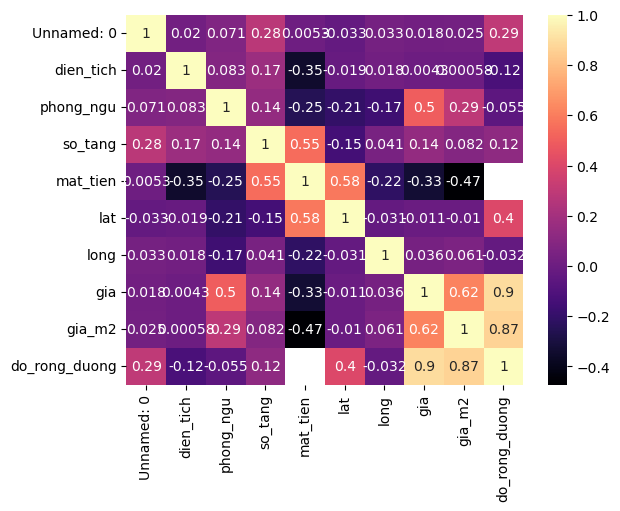

In [6]:
# 1. Heatmap

sns.heatmap(df.corr(), annot = True, cmap = 'magma')
plt.show()

In [7]:
quan_cols = [col for col in df.columns if df[col].dtype in [int,float]]
quan_cols

['Unnamed: 0',
 'dien_tich',
 'phong_ngu',
 'so_tang',
 'mat_tien',
 'lat',
 'long',
 'gia',
 'gia_m2',
 'do_rong_duong']

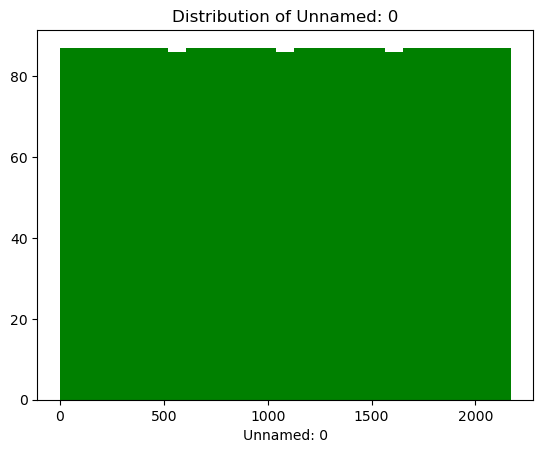

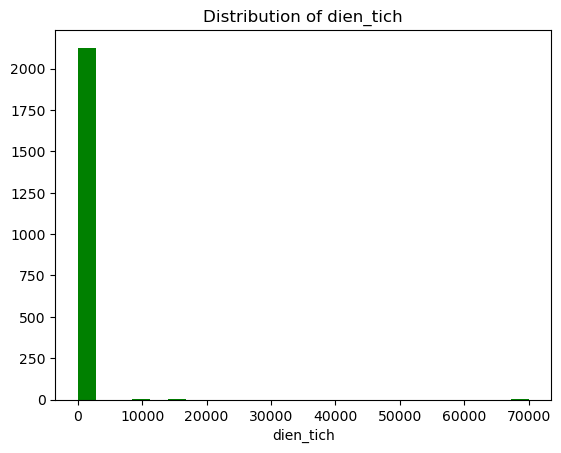

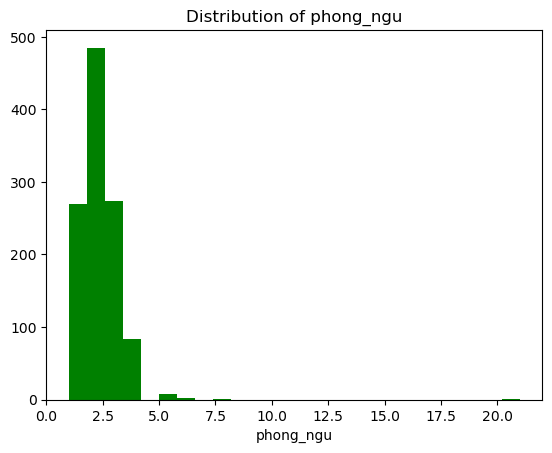

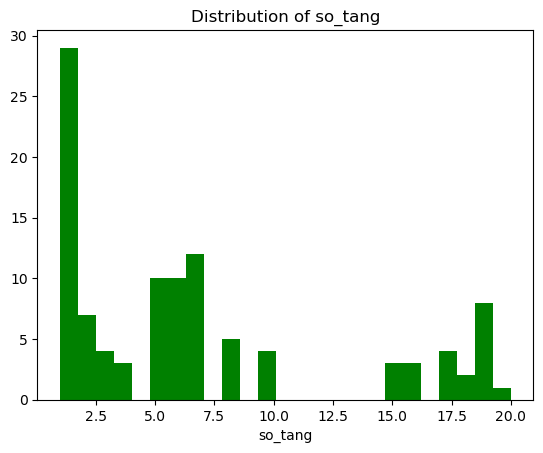

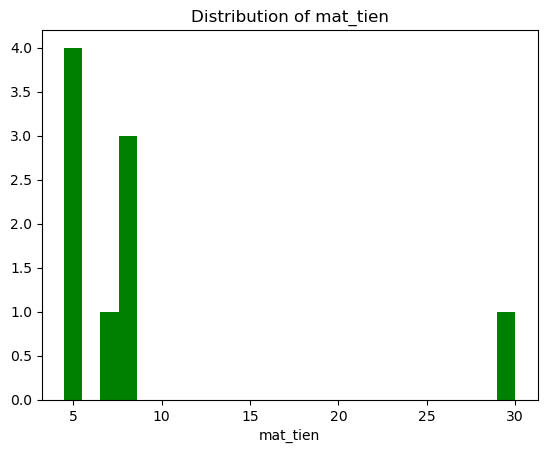

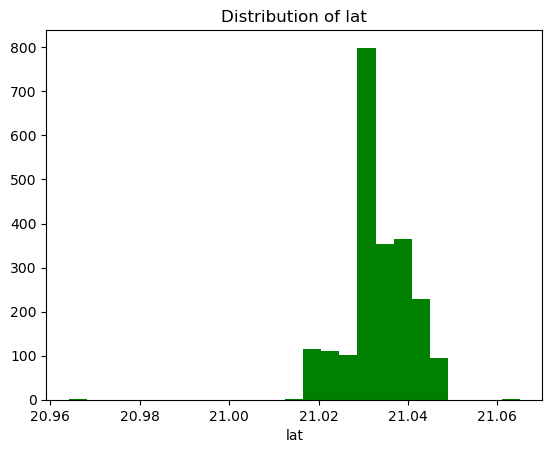

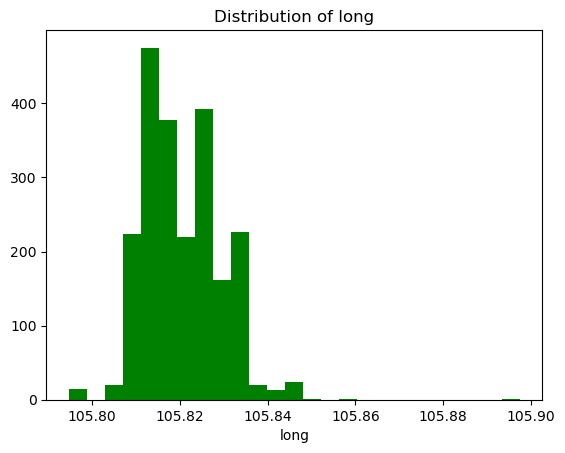

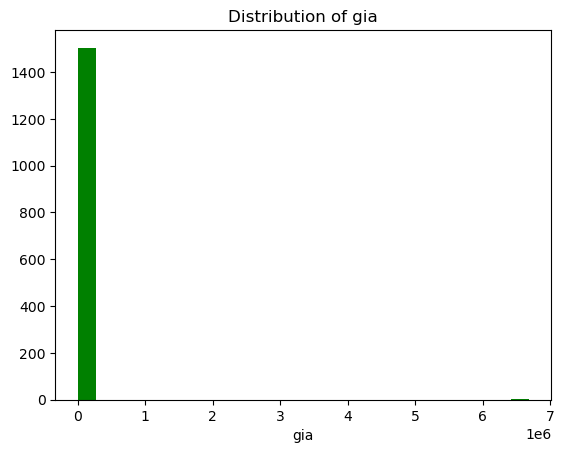

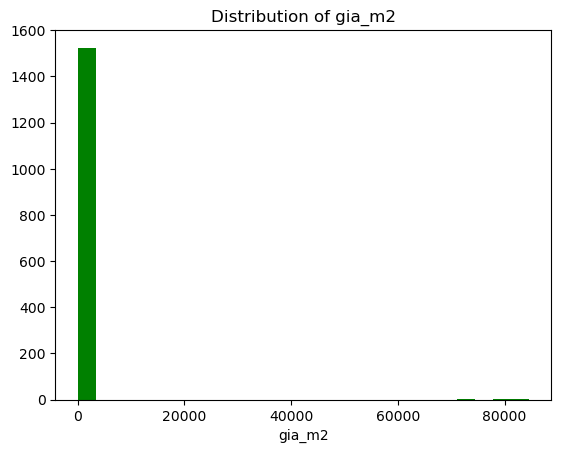

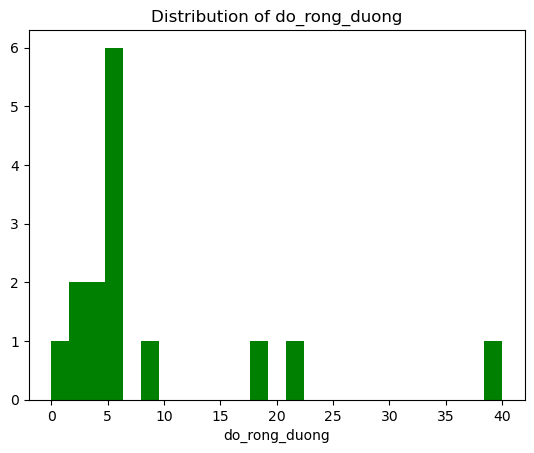

In [8]:
# Histograms:
for i in quan_cols:
    plt.hist(df[i], bins = 25, color = "g")
    plt.xlabel(i)
    plt.title("Distribution of" +" " + i)
    plt.show()

/var/folders/_n/dvkgp5mx05lf2bk9v3v0gltr0000gn/T/ipykernel_4622/1633785295.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['gia'], color = 'r')


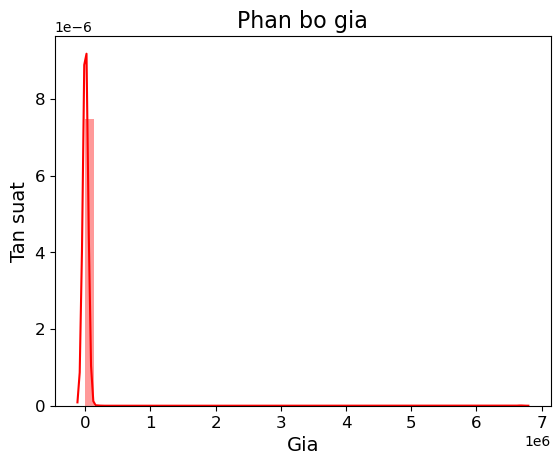

In [9]:
# 3. Distribution plot

sns.distplot(df['gia'], color = 'r')
plt.title('Phan bo gia', fontsize = 16)
plt.xlabel('Gia', fontsize = 14)
plt.ylabel('Tan suat', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

/var/folders/_n/dvkgp5mx05lf2bk9v3v0gltr0000gn/T/ipykernel_4622/2838641800.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['gia_m2'], color = 'r')


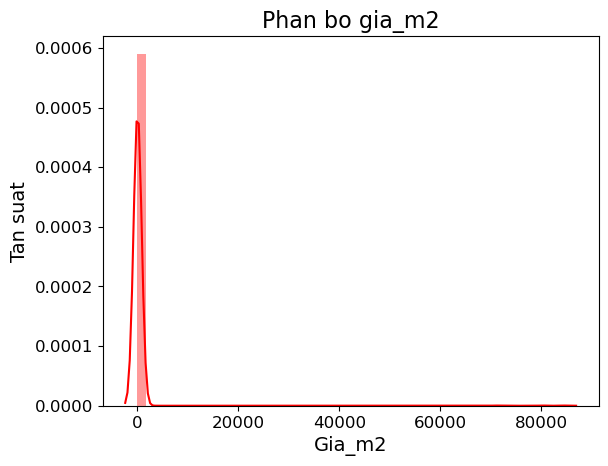

In [10]:
sns.distplot(df['gia_m2'], color = 'r')
plt.title('Phan bo gia_m2', fontsize = 16)
plt.xlabel('Gia_m2', fontsize = 14)
plt.ylabel('Tan suat', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

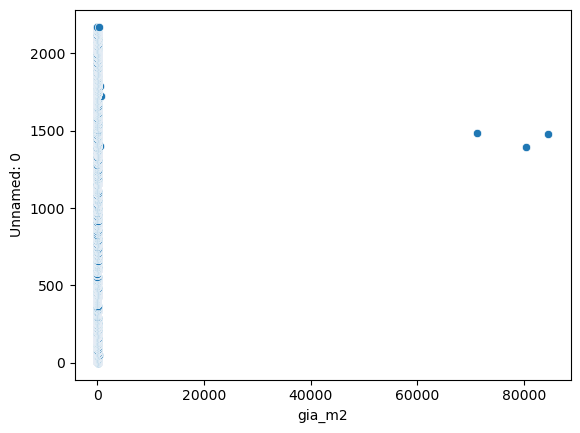

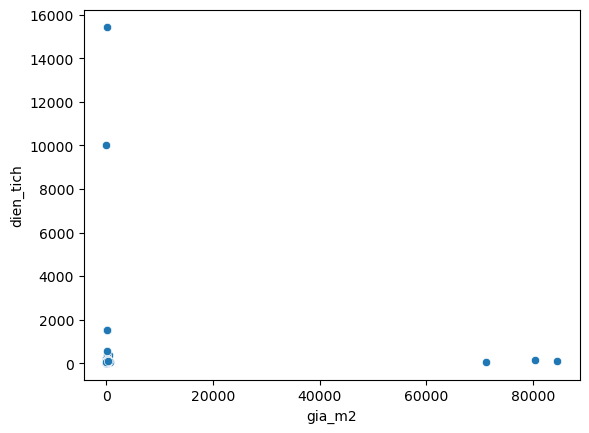

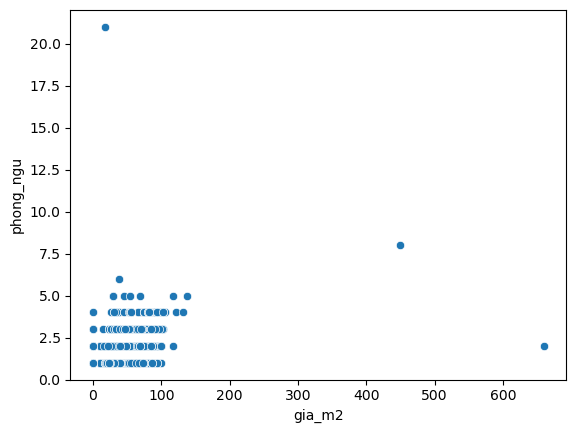

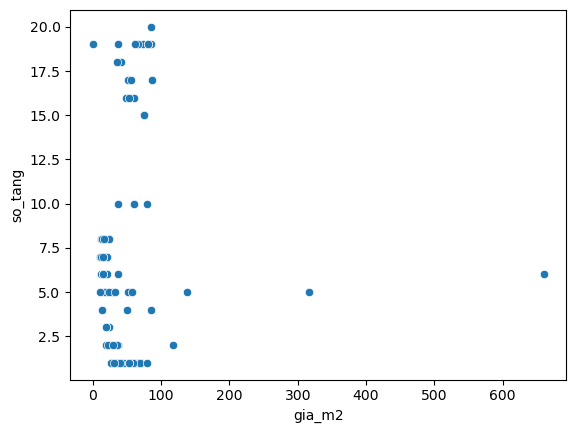

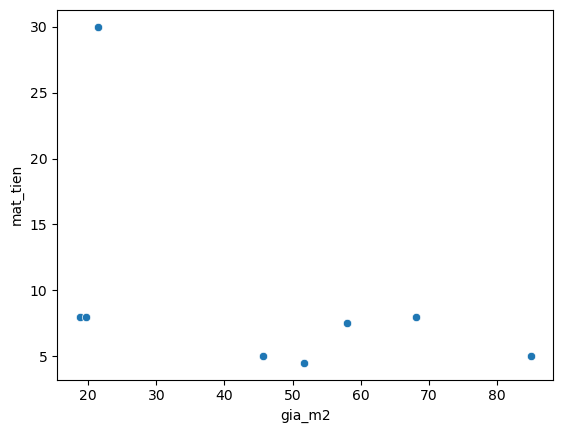

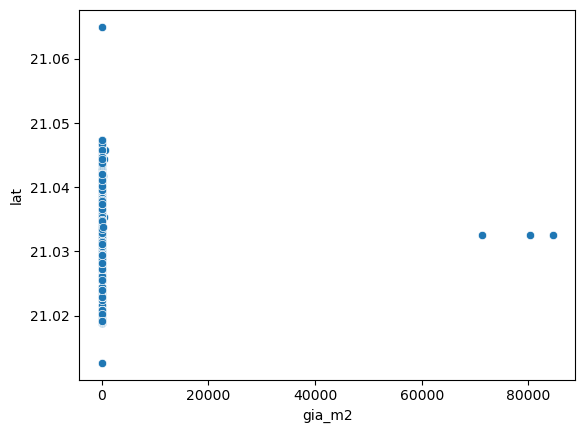

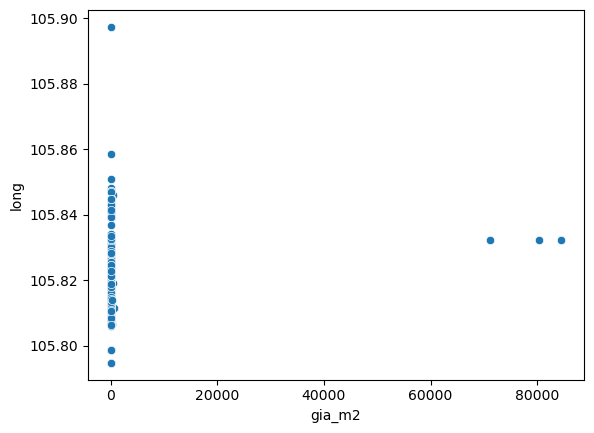

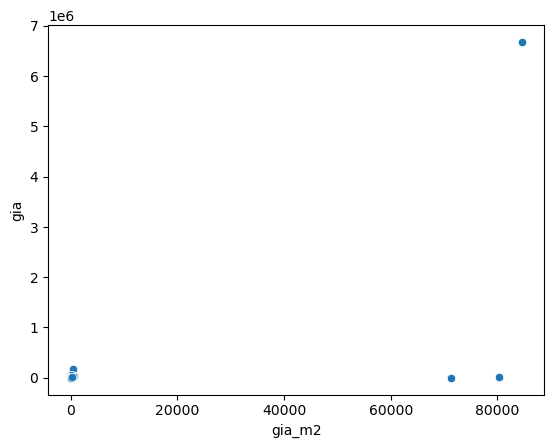

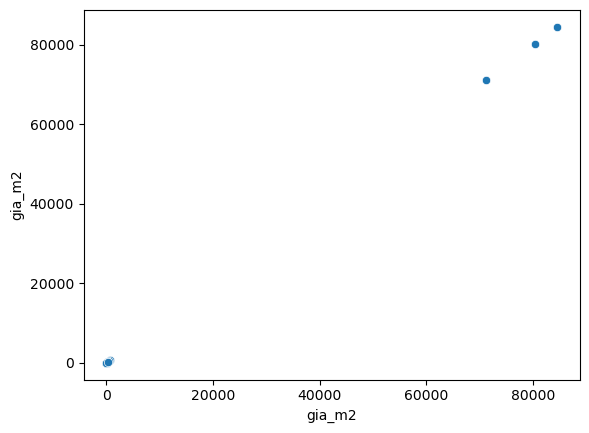

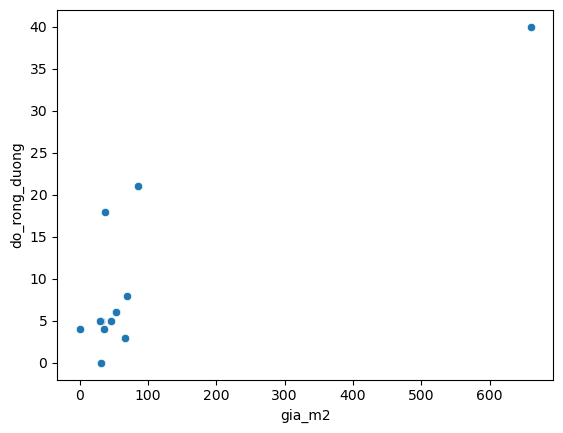

In [11]:
# 2. Scatter plot
for col in quan_cols:
    sns.scatterplot(x=df["gia_m2"], y = df[col], data = df)
    plt.show()

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


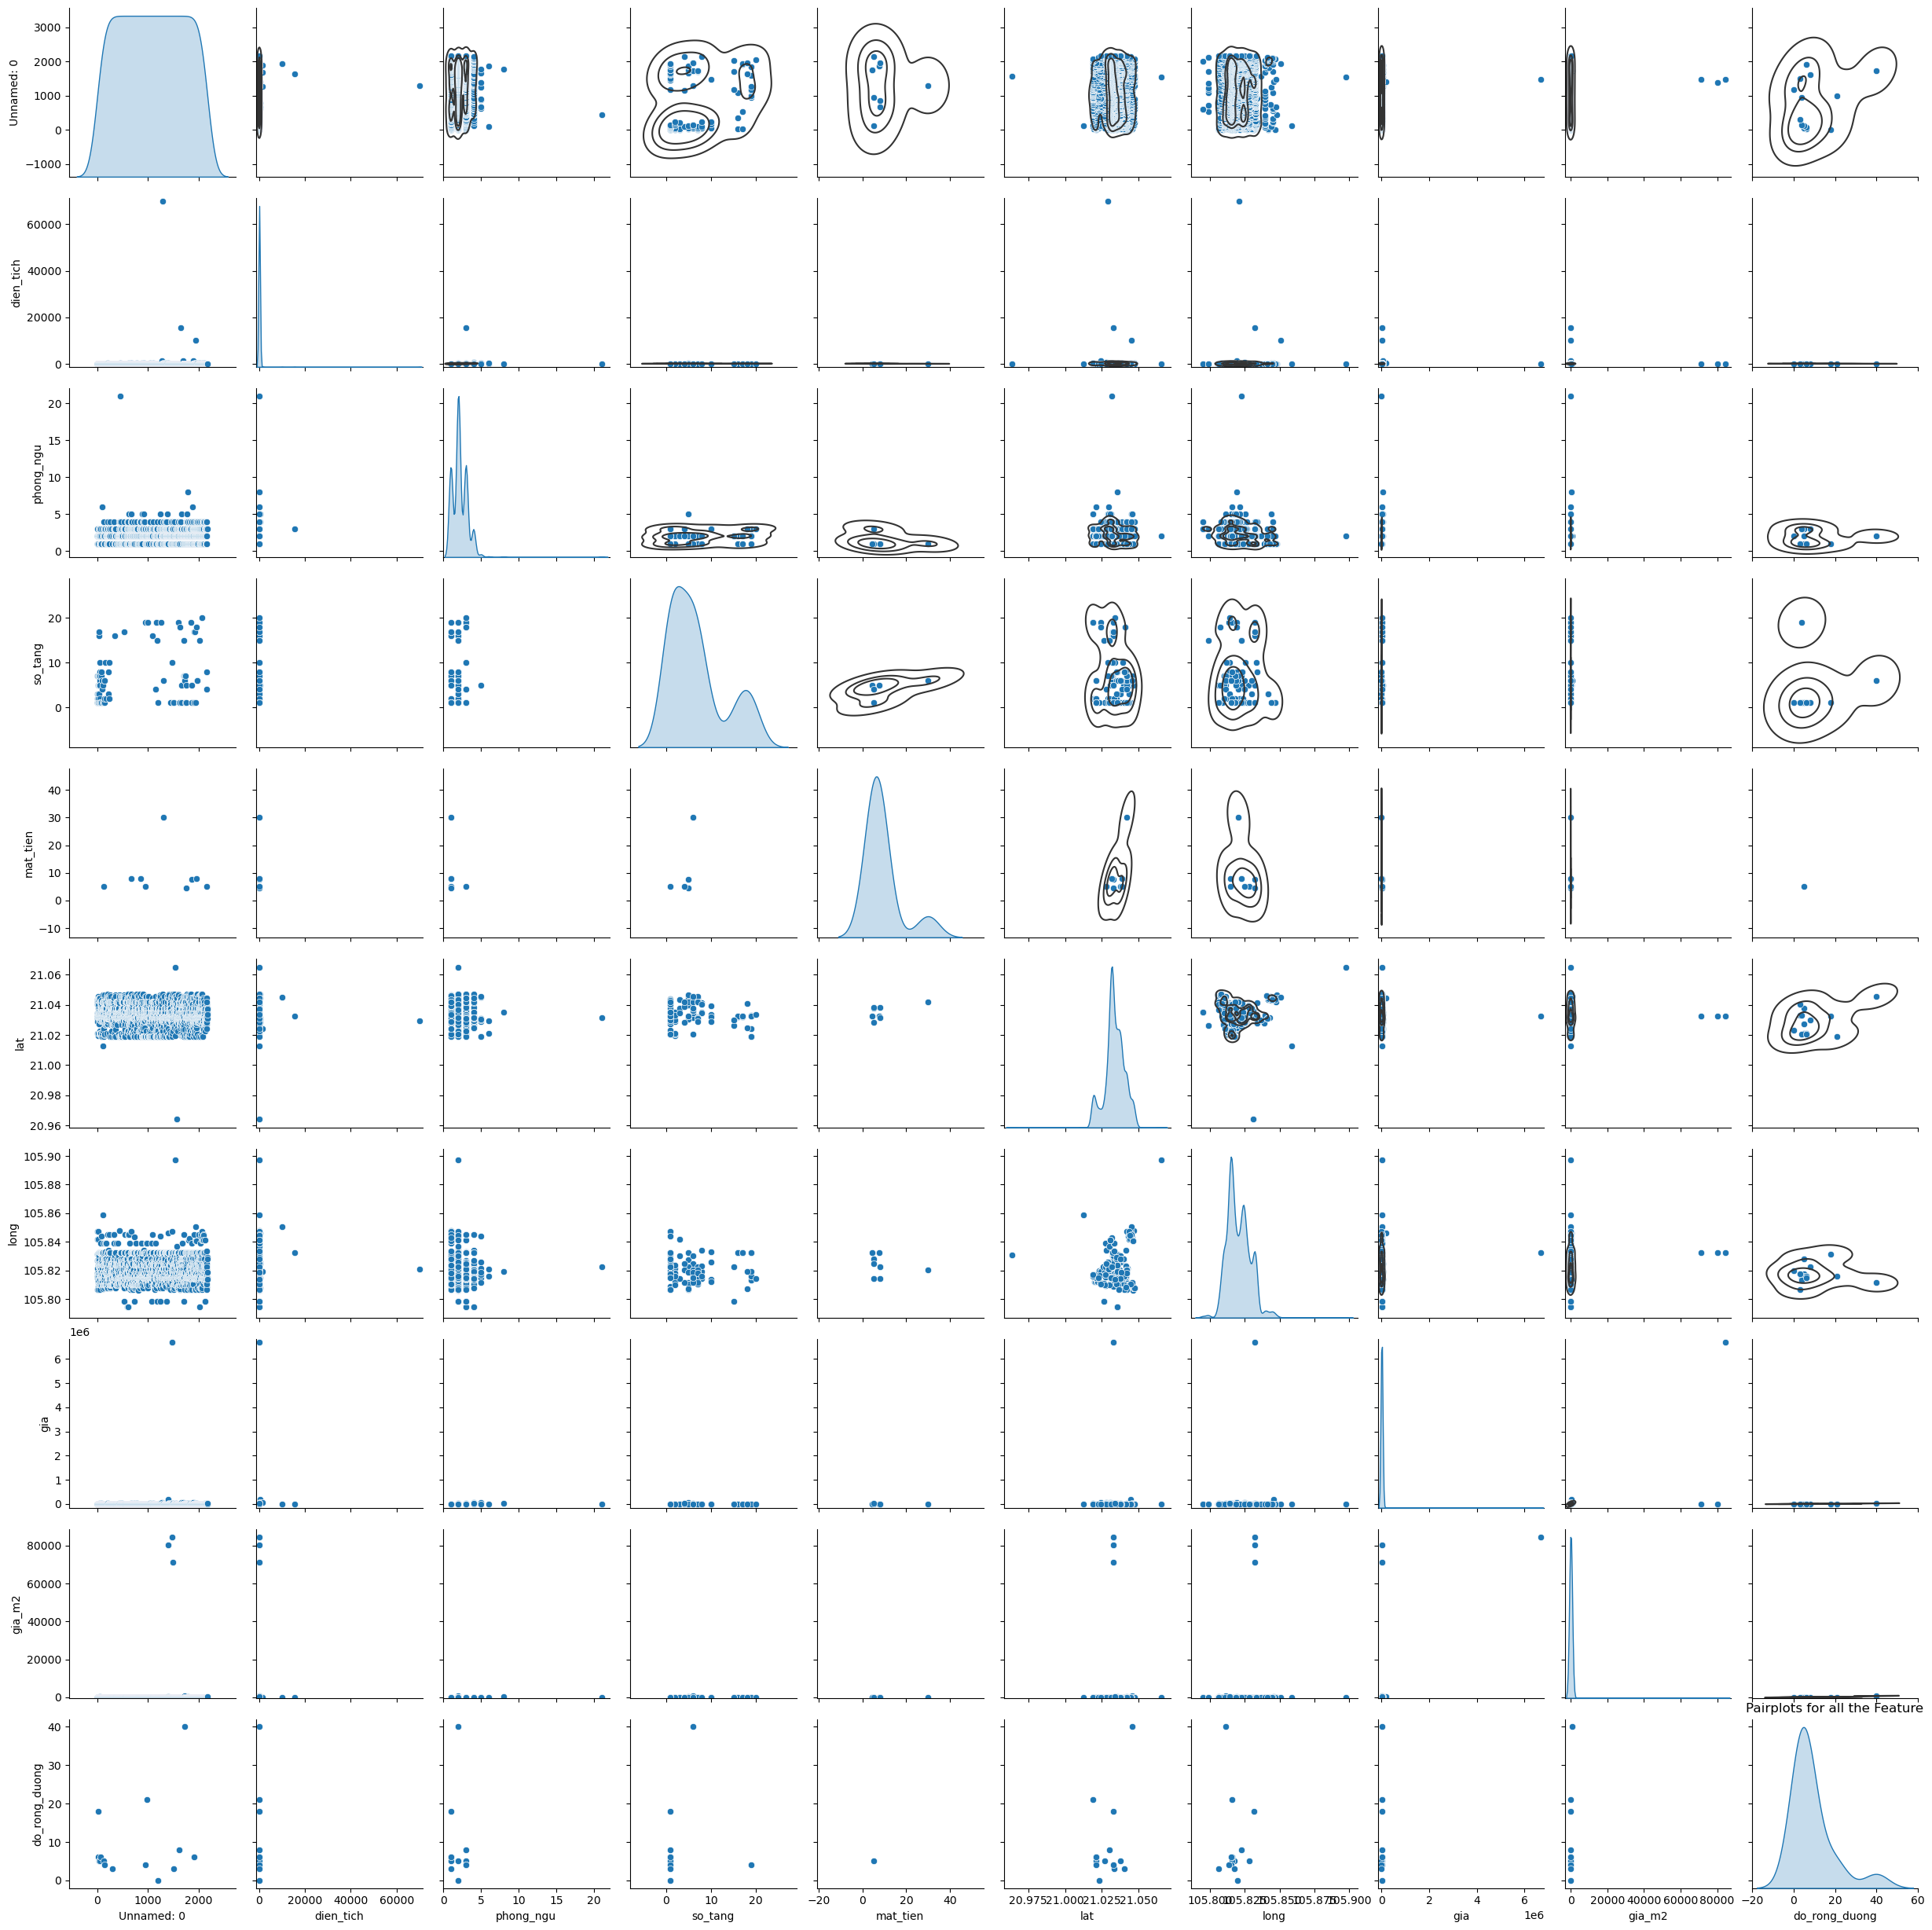

In [12]:
#Understanding the relationship between all the features
g = sns.pairplot(df,diag_kind = 'kde')
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

In [13]:
df["gia"] = df["gia"].fillna(df.groupby("dien_tich")["gia"].transform("median"))

In [14]:
df["phong_ngu"] = df["phong_ngu"].fillna(df.groupby("dien_tich")["phong_ngu"].transform("median"))

In [15]:
df["gia_m2"] = df["gia_m2"].fillna(df.groupby(["dien_tich","gia"])["gia_m2"].transform("median"))

In [16]:
df["do_rong_duong"].fillna(df.groupby("id_duong")["do_rong_duong"].transform("median"), inplace = True)

In [17]:
# Dataprocessing
features = ['dien_tich','phong_ngu','lat', 'long', 'gia','gia_m2','do_rong_duong']
target_df = df[features]
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dien_tich      2130 non-null   float64
 1   phong_ngu      2109 non-null   float64
 2   lat            2170 non-null   float64
 3   long           2170 non-null   float64
 4   gia            2117 non-null   float64
 5   gia_m2         2065 non-null   float64
 6   do_rong_duong  1243 non-null   float64
dtypes: float64(7)
memory usage: 118.9 KB


In [18]:
target_df=target_df.dropna().reset_index(drop=True)
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dien_tich      1157 non-null   float64
 1   phong_ngu      1157 non-null   float64
 2   lat            1157 non-null   float64
 3   long           1157 non-null   float64
 4   gia            1157 non-null   float64
 5   gia_m2         1157 non-null   float64
 6   do_rong_duong  1157 non-null   float64
dtypes: float64(7)
memory usage: 63.4 KB


In [19]:
# corr = target_df.corr()
# sns.heatmap(corr, annot=True)

In [20]:
# Remove outliers

def get_index_remove(df,column):
    data = df[column].values
    upper_quartile = np.percentile(data, 75)
    lower_quartile = np.percentile(data, 25)
    
    iqr = upper_quartile - lower_quartile
    
    lower_value = lower_quartile-1.5*iqr
    upper_value = upper_quartile+1.5*iqr
    
    index = []
    lower_idx = df[df[column]<=lower_value].index
    index.extend(lower_idx)
    
    index = []
    upper_idx = df[df[column]>=upper_value].index
    index.extend(upper_idx)
    return index


list_index_remove = []
for col in features:
    outliers = get_index_remove(target_df, col)
    list_index_remove.extend(outliers)
    
clean_df = target_df.drop(list_index_remove, axis = 0).reset_index(drop = True)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dien_tich      934 non-null    float64
 1   phong_ngu      934 non-null    float64
 2   lat            934 non-null    float64
 3   long           934 non-null    float64
 4   gia            934 non-null    float64
 5   gia_m2         934 non-null    float64
 6   do_rong_duong  934 non-null    float64
dtypes: float64(7)
memory usage: 51.2 KB


In [21]:
# Build model
X_columns = ['dien_tich','phong_ngu','lat', 'long', 'gia',"do_rong_duong"]
y_columns = ['gia_m2']

X = clean_df[X_columns].values
y = clean_df[y_columns].values

In [22]:
# Data normalize:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.37037037, 0.33333333, 0.44922209, 0.4855512 , 0.50399976,
        0.23809524],
       [0.66666667, 0.66666667, 0.45275015, 0.47567984, 0.81999991,
        0.23809524],
       [0.55555556, 0.33333333, 0.07400066, 0.50524969, 0.20799962,
        0.26190476],
       ...,
       [0.92592593, 0.66666667, 0.3917745 , 0.66396983, 0.63999983,
        0.        ],
       [0.66666667, 0.66666667, 0.34260715, 0.76968596, 0.40939972,
        0.        ],
       [0.40740741, 0.66666667, 0.45275015, 0.47567984, 0.43199973,
        0.19047619]])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [24]:
# MODELING

# 1. Ordinary Least Square (OLS)

LR = LinearRegression()
LR.fit(X_train, y_train)
LR_ypred = LR.predict(X_test)


# 2. Ridge

RD = Ridge(alpha = 0.5)
RD.fit(X_train, y_train)
RD_ypred = RD.predict(X_test)


# 3. Lasso

LS = Lasso(alpha = 0.01)
LS.fit(X_train, y_train)
LS_ypred = LS.predict(X_test)

# 4. Bayesian

BY = BayesianRidge()
BY.fit(X_train, y_train)
BY_ypred = BY.predict(X_test)

# 5. ElasticNet

EN = ElasticNet(alpha = 0.01)
EN.fit(X_train, y_train)
EN_ypred = EN.predict(X_test)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
# 1. Coefficients

print('Coefficients:')
print('-------------------------------------------------------------------------------')
print('Coefficients of Linear Regression model are {}'.format(LR.coef_))
print('-------------------------------------------------------------------------------')
print('Coefficients of Ridge model are {}'.format(RD.coef_))
print('-------------------------------------------------------------------------------')
print('Coefficients of Lasso model are {}'.format(LS.coef_))
print('-------------------------------------------------------------------------------')
print('Coefficients of Bayesian model are {}'.format(BY.coef_))
print('-------------------------------------------------------------------------------')
print('Coefficients of ElasticNet are {}'.format(EN.coef_))
print('-------------------------------------------------------------------------------')

Coefficients:
-------------------------------------------------------------------------------
Coefficients of Linear Regression model are [[-57.4099317   -7.92057731 -17.60309496  -3.8612533  127.39549318
    6.64222542]]
-------------------------------------------------------------------------------
Coefficients of Ridge model are [[-47.5970096   -9.80957395 -17.02405489  -3.62243344 119.97161108
    7.14778052]]
-------------------------------------------------------------------------------
Coefficients of Lasso model are [-55.75223351  -8.06645734 -17.28450597  -3.33190058 126.14782581
   6.34853094]
-------------------------------------------------------------------------------
Coefficients of Bayesian model are [-56.77863198  -8.05123519 -17.56612928  -3.84781053 126.92949485
   6.67410602]
-------------------------------------------------------------------------------
Coefficients of ElasticNet are [-16.07686138 -12.4538808  -14.92099405  -1.94333541  91.74166818
   8.76793115]
-

In [26]:
# R-squared

print('R-SQUARED:')
print('-------------------------------------------------------------------------------')
print('R-Squared of Linear Regression model is {}'.format(r2(y_test, LR_ypred)))
print('-------------------------------------------------------------------------------')
print('R-Squared of Ridge model is {}'.format(r2(y_test, RD_ypred)))
print('-------------------------------------------------------------------------------')
print('R-Squared of Lasso model is {}'.format(r2(y_test, LS_ypred)))
print('-------------------------------------------------------------------------------')
print('R-Squared of Bayesian model is {}'.format(r2(y_test, BY_ypred)))
print('-------------------------------------------------------------------------------')
print('R-Squared of ElasticNet is {}'.format(r2(y_test, EN_ypred)))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of Linear Regression model is 0.8576005290466076
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.8549771598295635
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.8570308577209789
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.8575212668904549
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.8204294299560968
-------------------------------------------------------------------------------


In [27]:
# Mean absolute percentage error (MAPE)

print('Mean absolute percentage error (MAPE):')
print('-------------------------------------------------------------------------------')
print('Mean absolute percentage error (MAPE) of Linear Regression model is {}'.format(mean_absolute_percentage_error(y_test, LR_ypred)))
print('-------------------------------------------------------------------------------')
print('Mean absolute percentage error (MAPE) of Ridge model is {}'.format(mean_absolute_percentage_error(y_test, RD_ypred)))
print('-------------------------------------------------------------------------------')
print('Mean absolute percentage error (MAPE) of Lasso model is {}'.format(mean_absolute_percentage_error(y_test, LS_ypred)))
print('-------------------------------------------------------------------------------')
print('Mean absolute percentage error (MAPE) of Bayesian model is {}'.format(mean_absolute_percentage_error(y_test, BY_ypred)))
print('-------------------------------------------------------------------------------')
print('Mean absolute percentage error (MAPE) of ElasticNet is {}'.format(mean_absolute_percentage_error(y_test, EN_ypred)))
print('-------------------------------------------------------------------------------')

Mean absolute percentage error (MAPE):
-------------------------------------------------------------------------------
Mean absolute percentage error (MAPE) of Linear Regression model is 0.20781109617975504
-------------------------------------------------------------------------------
Mean absolute percentage error (MAPE) of Ridge model is 0.20566492216229768
-------------------------------------------------------------------------------
Mean absolute percentage error (MAPE) of Lasso model is 0.2075567428739808
-------------------------------------------------------------------------------
Mean absolute percentage error (MAPE) of Bayesian model is 0.20766072658564919
-------------------------------------------------------------------------------
Mean absolute percentage error (MAPE) of ElasticNet is 0.22400683231808255
-------------------------------------------------------------------------------
